## 1. Import Dependencies

In [16]:
pip install gymnasium stable-baselines3

Note: you may need to restart the kernel to use updated packages.


In [17]:
## RUN This in the conda env terminal
## ale-import-roms --import-from-pkg atari_py.atari_roms

In [27]:
import os
import gymnasium as gym 
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_atari_env
import cv2

## 2. Test Environment

In [28]:
env = gym.make('ALE/Breakout-v5', render_mode="rgb_array")

In [29]:
env.reset()

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 {'lives': 5, 'episode_frame_number': 0, 'frame_number': 0})

In [30]:
env.action_space

Discrete(4)

In [31]:
env.observation_space
#Shows an image - Image based model

Box(0, 255, (210, 160, 3), uint8)

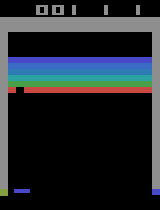


Final Results:
Episode 1: Score = 0.00
Episode 2: Score = 0.00
Episode 3: Score = 5.00
Episode 4: Score = 0.00
Episode 5: Score = 1.00


In [32]:
episodes = 5
episode_scores=[]
for episode in range(1, episodes + 1):
    obs = env.reset()
    done = False
    score = 0

    while not done:
        frame = env.render()
        # Convert RGB to BGR (OpenCV uses BGR format)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        # Convert to PIL image and display
        img = Image.fromarray(frame)
        clear_output(wait=True)
        display(img)

        action = env.action_space.sample()
        obs, reward, done, info, _ = env.step(action)
        score += reward

    episode_scores.append(score)
    #print(f'Episode {episode}: Score = {score:.2f}')

env.close()

# Print all episodes' scores in final output
print("\nFinal Results:")
for i, score in enumerate(episode_scores, start=1):
    print(f"Episode {i}: Score = {score:.2f}")

## 3. Vectorise Environment and Train Model

In [7]:
env = make_atari_env('ALE/Breakout-v5', n_envs=4, seed=0)
#4 envs to make it faster
env = VecFrameStack(env, n_stack=4)

In [8]:
env.reset()

array([[[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        ...,

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]],


       [[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0

In [9]:
frame = env.render()
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
cv2.imshow("CartPole", frame)
cv2.waitKey(5000)  # 1ms delay
cv2.destroyAllWindows()
env.close()

In [10]:
log_path = os.path.join('Training', 'Logs')
model = A2C('CnnPolicy', env, verbose=1, tensorboard_log = log_path)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [11]:
model.learn(total_timesteps=100000)
#Increase the number for better performance

Logging to Training\Logs\A2C_2
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 226      |
|    ep_rew_mean        | 1.56     |
| time/                 |          |
|    fps                | 160      |
|    iterations         | 100      |
|    time_elapsed       | 12       |
|    total_timesteps    | 2000     |
| train/                |          |
|    entropy_loss       | -1.37    |
|    explained_variance | 0.559    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.0603   |
|    value_loss         | 0.169    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 233      |
|    ep_rew_mean        | 1.73     |
| time/                 |          |
|    fps                | 174      |
|    iterations         | 200      |
|    time_elapsed       | 22       |
|    total_timesteps    | 4000     |
| train

## 4. Save and Reload Model

In [12]:
a2c_path = os.path.join('Training','Saved Models','A2C_100K_Model')
model.save(a2c_path)

In [13]:
del model

In [3]:
a2c_path = os.path.join('Training','Saved Models','A2C_100K_Model')
model = A2C.load(a2c_path, env)

Wrapping the env in a VecTransposeImage.


In [10]:
env = make_atari_env('ALE/Breakout-v5', n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)

## 5. Evaluate and Test

In [33]:
env = make_atari_env('ALE/Breakout-v5', n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)
evaluate_policy(model, env, n_eval_episodes=5, render=True, return_episode_rewards=True)

([25.0, 39.0, 28.0, 30.0, 42.0], [922, 1123, 641, 1044, 1224])

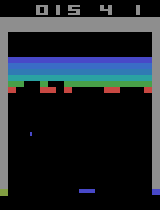

In [34]:
# One way to visualize
env = make_atari_env('ALE/Breakout-v5', n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)
obs = env.reset()
for i in range(1300):
    action, _states = model.predict(obs, deterministic=True) 
    obs, rewards, dones, info = env.step(action) 

    frame = env.render()
    # Convert RGB to BGR (OpenCV uses BGR format)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    # Convert to PIL image and display
    img = Image.fromarray(frame)
    clear_output(wait=True)
    display(img)